In this Notebook we develop the modeling process. 

For the construction of a raw dataset from Mercado Libre's APIs please refer to "Build_Dataset" Notebook.

For the data analysis and preparation please refer to "Database_Analysis" Notebook.

In [25]:
#Import libraries
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
with open('dataframe.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
#Final dataframe
df.head(3)

,id,listing_type_id,price,original_price,sold_quantity,available_quantity,id_seller,free_shipping_0,tag_1_catalog_boost,tag_1_catalog_forewarning,...,tag_5_best_seller_candidate,tag_5_cart_eligible,tag_5_dragged_bids_and_visits,tag_5_good_quality_picture,tag_5_immediate_payment,tag_5_loyalty_discount_eligible,tag_5_shipping_guaranteed,tag_5_supermarket_eligible,item_id_encoded,id_clustered
0,MCO1433346850,1,-0.058884,-0.058884,0.557589,-0.039991,34541957,0,0,0,...,0,0,0,0,0,0,1,0,370,37
1,MCO935603440,1,-0.026230,-0.026230,0.557589,-0.099569,69407075,1,0,0,...,1,0,0,0,0,0,0,0,952,46
2,MCO1205825188,1,-0.045349,-0.045349,0.113334,-0.099569,69407075,1,0,0,...,0,0,0,0,0,0,0,0,91,2


In [4]:
#We drop the id variable that identifies items, since we are using the id clustered variable
df = df.drop('id', axis=1)

# Modeling

We are going two train two types of models: clustering models and anomaly detection models. For clusterization we train the following models:

* K-Means
* Hierarchical Clustering
* DBSCAN Clustering

For the anomaly detection, we train the **Isolation Forest** model.

In [5]:
relevant_features = ['listing_type_id', 'price', 'original_price', 'sold_quantity',
       'available_quantity', 'id_seller', 'free_shipping_0',
       'tag_1_catalog_boost', 'tag_1_catalog_forewarning',
       'tag_1_catalog_listing_eligible', 'tag_1_catalog_only_restricted',
       'tag_1_dragged_bids_and_visits', 'tag_1_good_quality_picture',
       'tag_1_good_quality_thumbnail', 'tag_1_immediate_payment',
       'tag_1_incomplete_technical_specs', 'tag_1_loyalty_discount_eligible',
       'tag_1_moderation_penalty', 'tag_1_poor_quality_picture',
       'tag_1_poor_quality_thumbnail', 'tag_1_standard_price_by_channel',
       'tag_1_supermarket_eligible', 'tag_2_cart_eligible',
       'tag_2_catalog_listing_eligible', 'tag_2_deal_of_the_day',
       'tag_2_dragged_bids_and_visits', 'tag_2_good_quality_picture',
       'tag_2_good_quality_thumbnail', 'tag_2_immediate_payment',
       'tag_2_incomplete_technical_specs', 'tag_2_loyalty_discount_eligible',
       'tag_2_moderation_penalty', 'tag_2_poor_quality_picture',
       'tag_2_poor_quality_thumbnail', 'tag_2_standard_price_by_channel',
       'tag_2_supermarket_eligible', 'tag_3_best_seller_candidate',
       'tag_3_cart_eligible', 'tag_3_deal_of_the_day',
       'tag_3_good_quality_picture', 'tag_3_good_quality_thumbnail',
       'tag_3_immediate_payment', 'tag_3_incomplete_technical_specs',
       'tag_3_loyalty_discount_eligible', 'tag_3_moderation_penalty',
       'tag_3_poor_quality_picture', 'tag_3_poor_quality_thumbnail',
       'tag_3_shipping_guaranteed', 'tag_3_standard_price_by_channel',
       'tag_3_supermarket_eligible', 'tag_4_best_seller_candidate',
       'tag_4_cart_eligible', 'tag_4_catalog_listing_eligible',
       'tag_4_catalog_only_restricted', 'tag_4_dragged_bids_and_visits',
       'tag_4_good_quality_picture', 'tag_4_good_quality_thumbnail',
       'tag_4_immediate_payment', 'tag_4_loyalty_discount_eligible',
       'tag_4_meli_choice_candidate', 'tag_4_moderation_penalty',
       'tag_4_shipping_guaranteed', 'tag_4_standard_price_by_channel',
       'tag_4_supermarket_eligible', 'tag_5_best_seller_candidate',
       'tag_5_cart_eligible', 'tag_5_dragged_bids_and_visits',
       'tag_5_good_quality_picture', 'tag_5_immediate_payment',
       'tag_5_loyalty_discount_eligible', 'tag_5_shipping_guaranteed',
       'tag_5_supermarket_eligible', 'id_clustered']

In [12]:
# Step 1: Splitting the dataset into train and test
X_train, X_test = train_test_split(df[relevant_features], test_size=0.2, random_state=42)

In [14]:
# 2. Train Clustering Models and Isolation Forest
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5)  
kmeans.fit(X_train)
train_kmeans_labels = kmeans.labels_

# Perform Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)  # Specify the number of clusters
hierarchical.fit(X_train)
train_hierarchical_labels = hierarchical.labels_

# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan.fit(X_train)
train_dbscan_labels = dbscan.labels_

# Train Isolation Forest
isolation_forest = IsolationForest(contamination=0.1)  # Specify the contamination parameter
isolation_forest.fit(X_train)
train_isolation_forest_labels = isolation_forest.predict(X_train)

# 3. Evaluate Models' Performance
# Evaluate Clustering Models
print("K-Means Clustering:")
print("Silhouette Score:", metrics.silhouette_score(X_train, train_kmeans_labels))
print("Calinski-Harabasz Score:", metrics.calinski_harabasz_score(X_train, train_kmeans_labels))
print("")

print("Hierarchical Clustering:")
print("Silhouette Score:", metrics.silhouette_score(X_train, train_hierarchical_labels))
print("Calinski-Harabasz Score:", metrics.calinski_harabasz_score(X_train, train_hierarchical_labels))
print("")

print("DBSCAN Clustering:")
print("Silhouette Score:", metrics.silhouette_score(X_train, train_dbscan_labels))
print("Calinski-Harabasz Score:", metrics.calinski_harabasz_score(X_train, train_dbscan_labels))
print("")

# Evaluate Isolation Forest
train_anomaly_percentage = (train_isolation_forest_labels == -1).mean() * 100
print("Isolation Forest:")
print("Percentage of anomalies detected:", train_anomaly_percentage)
print("")

C:\Users\Asus ZenBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus ZenBook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K-Means Clustering:
Silhouette Score: 0.7093831821557426
Calinski-Harabasz Score: 10115.476049435909

Hierarchical Clustering:
Silhouette Score: 0.667544697960287
Calinski-Harabasz Score: 7893.6971626109735

DBSCAN Clustering:
Silhouette Score: -0.09082110287867617
Calinski-Harabasz Score: 50.98832972133244

Isolation Forest:
Percentage of anomalies detected: 10.0



C:\Users\Asus ZenBook\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


## Evaluation

In [17]:
# 4. Test Models' Performance on Test Data
# Predict labels for test data using trained models
test_kmeans_labels = kmeans.predict(X_test)
test_hierarchical_labels = hierarchical.fit_predict(X_test)
test_dbscan_labels = dbscan.fit_predict(X_test)
test_isolation_forest_labels = isolation_forest.predict(X_test)

# Evaluate Clustering Models on Test Data
print("K-Means Clustering (Test Data):")
print("Silhouette Score:", metrics.silhouette_score(X_test, test_kmeans_labels))
print("Calinski-Harabasz Score:", metrics.calinski_harabasz_score(X_test, test_kmeans_labels))
print("")

print("Hierarchical Clustering (Test Data):")
print("Silhouette Score:", metrics.silhouette_score(X_test, test_hierarchical_labels))
print("Calinski-Harabasz Score:", metrics.calinski_harabasz_score(X_test, test_hierarchical_labels))
print("")

print("DBSCAN Clustering (Test Data):")
if len(set(test_dbscan_labels)) > 1:
    print("Silhouette Score:", metrics.silhouette_score(X_test, test_dbscan_labels))
    print("Calinski-Harabasz Score:", metrics.calinski_harabasz_score(X_test, test_dbscan_labels))
else:
    print("Only one cluster found. Evaluation metrics cannot be calculated.")
print("")

# Evaluate Isolation Forest on Test Data
test_anomaly_percentage = (test_isolation_forest_labels == -1).mean() * 100
print("Isolation Forest (Test Data):")
print("Percentage of anomalies detected:", test_anomaly_percentage)

K-Means Clustering (Test Data):
Silhouette Score: 0.7020468345176719
Calinski-Harabasz Score: 2667.8594771626267

Hierarchical Clustering (Test Data):
Silhouette Score: 0.6740377642595838
Calinski-Harabasz Score: 2269.8642559559553

DBSCAN Clustering (Test Data):
Only one cluster found. Evaluation metrics cannot be calculated.

Isolation Forest (Test Data):
Percentage of anomalies detected: 11.5


After training these models, we can conclude that the best performance was obtained by the K-Means clustering.

In [18]:
#Save the K-Means model
model_filename = 'kmeans_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(kmeans, file)

In [19]:
# Load the saved model
with open(model_filename, 'rb') as file:
    saved_model = pickle.load(file)

# Cluster visualization

In [22]:
# Assign cluster labels to the complete dataframe
df['cluster_labels'] = saved_model.predict(df[relevant_features])

In [23]:
df

,listing_type_id,price,original_price,sold_quantity,available_quantity,id_seller,free_shipping_0,tag_1_catalog_boost,tag_1_catalog_forewarning,tag_1_catalog_listing_eligible,...,tag_5_cart_eligible,tag_5_dragged_bids_and_visits,tag_5_good_quality_picture,tag_5_immediate_payment,tag_5_loyalty_discount_eligible,tag_5_shipping_guaranteed,tag_5_supermarket_eligible,item_id_encoded,id_clustered,cluster_labels
0,1,-0.058884,-0.058884,0.557589,-0.039991,34541957,0,0,0,0,...,0,0,0,0,0,1,0,370,37,0
1,1,-0.026230,-0.026230,0.557589,-0.099569,69407075,1,0,0,0,...,0,0,0,0,0,0,0,952,46,0
2,1,-0.045349,-0.045349,0.113334,-0.099569,69407075,1,0,0,0,...,0,0,0,0,0,0,0,91,2,0
3,1,-0.025403,-0.025403,1.668227,-0.099569,57067053,1,0,0,0,...,0,0,0,0,0,0,0,717,16,0
4,1,-0.026170,-0.026170,-0.530836,0.019827,352257819,1,0,0,0,...,0,0,0,0,0,0,0,440,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,-0.069809,-0.069809,0.335461,-0.051954,55172203,0,0,0,0,...,0,0,0,0,0,0,0,538,18,0
996,1,-0.067558,-0.067558,0.557589,-0.099569,259666262,0,0,0,0,...,1,0,0,0,0,0,0,662,30,3
997,2,-0.024070,-0.024070,-0.330921,-0.099569,164168474,1,0,0,0,...,0,0,0,0,0,0,0,59,45,0
998,1,-0.067618,-0.067618,-0.544164,-0.099569,280824856,0,0,0,0,...,0,0,0,0,0,0,0,343,26,3


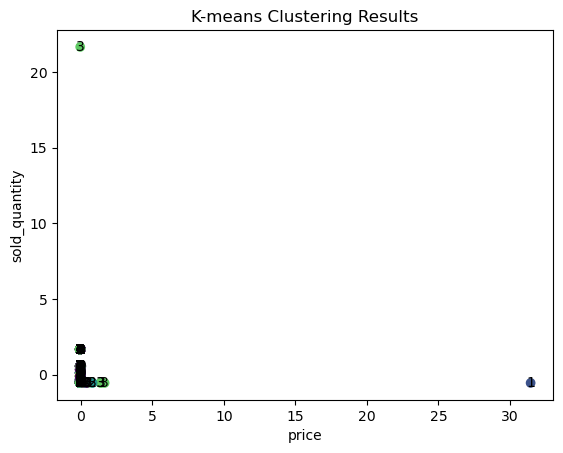

In [38]:
# Visualize the clusters
plt.scatter(df['price'], df['sold_quantity'], c=df['cluster_labels'])
plt.xlabel('price')
plt.ylabel('sold_quantity')
plt.title('K-means Clustering Results')
#plt.xlim(0, 1)  
#plt.ylim(0, 1)  
# Add cluster labels as text in the plot
for i, label in enumerate(df['cluster_labels']):
    plt.text(df['price'][i], df['sold_quantity'][i], str(label), color='black', ha='center', va='center')
plt.show()

It seems like the cluster 3 represent a larger sold quantity at a lower price.

In [41]:
grouped_data = df.groupby('cluster_labels')

cluster_stats = grouped_data.describe()
pd.set_option('display.max_columns', None)

cluster_stats

listing_type_id                                               \
                         count      mean       std  min  25%  50%  75%  max   
cluster_labels                                                                
0                        316.0  1.085443  0.279983  1.0  1.0  1.0  1.0  2.0   
1                        161.0  1.173913  0.380217  1.0  1.0  1.0  1.0  2.0   
2                        127.0  1.149606  0.358098  1.0  1.0  1.0  1.0  2.0   
3                        281.0  1.217082  0.412994  1.0  1.0  1.0  1.0  2.0   
4                        115.0  1.200000  0.401751  1.0  1.0  1.0  1.0  2.0   

                price                                                    \
                count      mean       std       min       25%       50%   
cluster_labels                                                            
0               316.0 -0.036815  0.051650 -0.073951 -0.064938 -0.049190   
1               161.0  0.156521  2.481078 -0.074491 -0.065427 -0.048053   
2               127.0 -0.029220  0.084240 -0.074386 -0.065919 -0.040967   
3               281.0 -0.021660  0.172261 -0.073576 -0.066808 -0.052252   
4               115.0 -0.032773  0.051370 -0.074011 -0.066688 -0.048065   

                                    original_price                      \
                     75%        max          count      mean       std   
cluster_labels                                                           
0              -0.026433   0.435156          316.0 -0.047355  0.209467   
1              -0.023589  31.438361          161.0  0.191865  2.502647   
2              -0.017738   0.825322          127.0 -0.073475  0.284767   
3              -0.031543   1.665680          281.0  0.011810  0.464753   
4              -0.029997   0.225067          115.0 -0.047583  0.113322   

                                                                   \
                     min       25%       50%       75%        max   
cluster_labels                                                      
0              -0.950139 -0.065866 -0.049385 -0.025385   2.607107   
1              -0.808475 -0.067896 -0.048080 -0.019568  31.438361   
2              -1.009638 -0.066418 -0.040727 -0.012494   1.350035   
3              -0.931251 -0.068098 -0.054082 -0.030972   3.746503   
4              -0.871204 -0.067303 -0.048065 -0.029997   0.225067   

               sold_quantity                                          \
                       count      mean       std       min       25%   
cluster_labels                                                         
0                      316.0 -0.006882  0.718910 -0.553049 -0.535279   
1                      161.0  0.156049  0.812941 -0.553049 -0.530836   
2                      127.0 -0.292268  0.430204 -0.553049 -0.533057   
3                      281.0  0.153459  1.514386 -0.553049 -0.530836   
4                      115.0 -0.251767  0.572056 -0.553049 -0.537500   

                                              available_quantity            \
                     50%       75%        max              count      mean   
cluster_labels                                                               
0              -0.441985  0.335461   1.668227              316.0 -0.091152   
1              -0.330921  0.557589   1.668227              161.0 -0.065985   
2              -0.530836 -0.108794   1.668227              127.0 -0.084763   
3              -0.330921  0.557589  21.659708              281.0 -0.079915   
4              -0.530836 -0.330921   1.668227              115.0  0.631728   

                                                                             \
                     std       min       25%       50%       75%        max   
cluster_labels                                                                
0               0.069458 -0.099569 -0.099569 -0.099569 -0.099569   1.096545   
1               0.163183 -0.099569 -0.099569 -0.099569 -0.087845   1.096545   
2               0.106490 -0.099569 -0.

From these statistics, we see that group number 3 not only has the a low mean price and a high mean sold quantity, but also a good value on positive tags. It also has the highest participation of free shipping compared to the other groups.

## Anomalies

In [42]:
#Save the Isolation Forest model
model_filename2 = 'isolation_forest_model.pkl'
with open(model_filename2, 'wb') as file:
    pickle.dump(isolation_forest, file)

In [43]:
# Load the saved model
with open(model_filename2, 'rb') as file:
    if_model = pickle.load(file)

In [44]:
# Assign labels to the complete dataframe
df['if_labels'] = if_model.predict(df[relevant_features])

In [45]:
df

,listing_type_id,price,original_price,sold_quantity,available_quantity,id_seller,free_shipping_0,tag_1_catalog_boost,tag_1_catalog_forewarning,tag_1_catalog_listing_eligible,tag_1_catalog_only_restricted,tag_1_dragged_bids_and_visits,tag_1_good_quality_picture,tag_1_good_quality_thumbnail,tag_1_immediate_payment,tag_1_incomplete_technical_specs,tag_1_loyalty_discount_eligible,tag_1_moderation_penalty,tag_1_poor_quality_picture,tag_1_poor_quality_thumbnail,tag_1_standard_price_by_channel,tag_1_supermarket_eligible,tag_2_cart_eligible,tag_2_catalog_listing_eligible,tag_2_deal_of_the_day,tag_2_dragged_bids_and_visits,tag_2_good_quality_picture,tag_2_good_quality_thumbnail,tag_2_immediate_payment,tag_2_incomplete_technical_specs,tag_2_loyalty_discount_eligible,tag_2_moderation_penalty,tag_2_poor_quality_picture,tag_2_poor_quality_thumbnail,tag_2_standard_price_by_channel,tag_2_supermarket_eligible,tag_3_best_seller_candidate,tag_3_cart_eligible,tag_3_deal_of_the_day,tag_3_good_quality_picture,tag_3_good_quality_thumbnail,tag_3_immediate_payment,tag_3_incomplete_technical_specs,tag_3_loyalty_discount_eligible,tag_3_moderation_penalty,tag_3_poor_quality_picture,tag_3_poor_quality_thumbnail,tag_3_shipping_guaranteed,tag_3_standard_price_by_channel,tag_3_supermarket_eligible,tag_4_best_seller_candidate,tag_4_cart_eligible,tag_4_catalog_listing_eligible,tag_4_catalog_only_restricted,tag_4_dragged_bids_and_visits,tag_4_good_quality_picture,tag_4_good_quality_thumbnail,tag_4_immediate_payment,tag_4_loyalty_discount_eligible,tag_4_meli_choice_candidate,tag_4_moderation_penalty,tag_4_shipping_guaranteed,tag_4_standard_price_by_channel,tag_4_supermarket_eligible,tag_5_best_seller_candidate,tag_5_cart_eligible,tag_5_dragged_bids_and_visits,tag_5_good_quality_picture,tag_5_immediate_payment,tag_5_loyalty_discount_eligible,tag_5_shipping_guaranteed,tag_5_supermarket_eligible,item_id_encoded,id_clustered,cluster_labels,if_labels
0,1,-0.058884,-0.058884,0.557589,-0.039991,34541957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,370,37,0,-1
1,1,-0.026230,-0.026230,0.557589,-0.099569,69407075,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,952,46,0,1
2,1,-0.045349,-0.045349,0.113334,-0.099569,69407075,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,2,0,1
3,1,-0.025403,-0.025403,1.668227,-0.099569,57067053,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,717,16,0,1
4,1,-0.026170,-0.026170,-0.530836,0.019827,352257819,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,440,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,-0.069809,-0.069809,0.335461,-0.051954,55172203,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,538,18,0,1
996,1,-0.067558,-0.067558,0.557589,-0.099569,259666262,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,662,30,3,1
997,2,-0.024070,-0.024070,-0.330921,-0.099569,164168474,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,45,0,1
998,1,-0.067618,-0.067618,-0.544164,-0.099569,280824856,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [46]:
df['if_labels'].value_counts()

 1    897
-1    103
Name: if_labels, dtype: int64

We now explore if the sellers located into cluster 3 and identified as an anomaly have a difference in values from the non-anomalies into group 3.

In [52]:
df['premium_seller'] = 0
df.loc[(df['cluster_labels'] == 3) & (df['if_labels'] == -1), 'premium_seller'] = 2
df.loc[(df['cluster_labels'] == 3) & (df['if_labels'] == 1), 'premium_seller'] = 1

In [55]:
grouped_data = df.groupby('premium_seller')

cluster_stats = grouped_data.describe()
pd.set_option('display.max_columns', None)

cluster_stats

listing_type_id                                               \
                         count      mean       std  min  25%  50%  75%  max   
premium_seller                                                                
0                        719.0  1.134910  0.341865  1.0  1.0  1.0  1.0  2.0   
1                        255.0  1.196078  0.397809  1.0  1.0  1.0  1.0  2.0   
2                         26.0  1.423077  0.503831  1.0  1.0  1.0  2.0  2.0   

                price                                                    \
                count      mean       std       min       25%       50%   
premium_seller                                                            
0               719.0  0.008465  1.175130 -0.074491 -0.065462 -0.048050   
1               255.0 -0.028790  0.140204 -0.073576 -0.066688 -0.050601   
2                26.0  0.048267  0.356408 -0.071490 -0.067438 -0.060134   

                                    original_price                      \
                     75%        max          count      mean       std   
premium_seller                                                           
0              -0.024475  31.438361          719.0  0.001562  1.200743   
1              -0.031408   1.425578          255.0  0.005586  0.465211   
2              -0.038761   1.665680           26.0  0.072852  0.464801   

                                                                   \
                     min       25%       50%       75%        max   
premium_seller                                                      
0              -1.009638 -0.066643 -0.048050 -0.023126  31.438361   
1              -0.931251 -0.068038 -0.052282 -0.030972   3.746503   
2              -0.495869 -0.068488 -0.063806 -0.023387   1.665680   

               sold_quantity                                          \
                       count      mean       std       min       25%   
premium_seller                                                         
0                      719.0 -0.059975  0.696844 -0.553049 -0.530836   
1                      255.0  0.105215  1.561237 -0.553049 -0.535279   
2                       26.0  0.626619  0.815172 -0.553049  0.113334   

                                              available_quantity            \
                     50%       75%        max              count      mean   
premium_seller                                                               
0              -0.441985  0.335461   1.668227              719.0  0.031232   
1              -0.441985  0.557589  21.659708              255.0 -0.079918   
2               0.557589  1.668227   1.668227               26.0 -0.079885   

                                                                             \
                     std       min       25%       50%       75%        max   
premium_seller                                                                
0               1.178383 -0.099569 -0.099569 -0.099569 -0.099569  11.863730   
1               0.042934 -0.099569 -0.099569 -0.099569 -0.099569   0.019827   
2               0.034747 -0.099569 -0.099569 -0.099569 -0.078872   0.019827   

               free_shipping_0                                                \
                         count      mean       std  min  25%  50%   75%  max   
premium_seller                                                                 
0                        719.0  0.504868  0.500324  0.0  0.0  1.0  1.00  1.0   
1                        255.0  0.462745  0.499591  0.0  0.0  0.0  1.00  1.0   
2                         26.0  0.269231  0.452344  0.0  0.0  0.0  0.75  1.0   

               tag_1_catalog_boost                                          \
                             count      mean       std  min  25%  50%  75%   
premium_seller                                                               
0                            719.0  0.002782  0.052705  0.0  0.0  0.0  0.0   
1                            255.0  0.003922  0.062622  0.0

In [58]:
result = df[['id_seller', 'premium_seller']]

In [59]:
# Group by 'id' and select the most frequent category
most_frequent_category = df.groupby('id_seller')['premium_seller'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [60]:
most_frequent_category

,id_seller,premium_seller
0,101128318,0
1,102195773,0
2,1032385099,0
3,1076481074,0
4,1079075411,0
...,...,...
190,86283304,0
191,86533388,0
192,86754699,0
193,87069999,0


In [61]:
most_frequent_category['premium_seller'].value_counts()

0    132
1     58
2      5
Name: premium_seller, dtype: int64

# Conclusion

Using a clustering model (K-Means), we found the group with the better values on average in terms of price, sold quantity, and attributes like free shipping and positive tags.

Subsequently, we used Isolation Forest to detect the extreme values into this category, and we verified that these anomalies represent a larger quantity sold.

Therefore, we define the Premium Seller classification, that provides a way to identify the most relevant sellers into this category according to the following values:

* 0: The seller in not relevant.
* 1: The seller is relevant. The seller has level 1 premium seller classification.
* 2: The seller belong to the most relevant sellers, since they have not only good attributes but larger sales. The seller has level 2 premium seller classification.